In [126]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import glob
import os

from PIL import Image
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.utils import timeseries_dataset_from_array
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomWidth, RandomHeight, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import SeparableConv2D, add, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from scipy.signal import resample


__<H1>Data Collection &#11088;<H1>__

In [12]:
!pip install gdown


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


__<h3>Create file directory for train, test, and validation data set</h3>__

In [98]:
import shutil
baseDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data"
os.mkdir(baseDir)

trainDir = os.path.join(baseDir, 'train')
os.mkdir(trainDir)

validationDir = os.path.join(baseDir, 'validation')
os.mkdir(validationDir)

testDir = os.path.join(baseDir, 'test')
os.mkdir(testDir)

trainHumanDir = os.path.join(trainDir, 'Human')
os.mkdir(trainHumanDir)

trainAIDir = os.path.join(trainDir, 'AI')
os.mkdir(trainAIDir)

validationHumanDir = os.path.join(validationDir, 'Human')
os.mkdir(validationHumanDir)

validationAIDir = os.path.join(validationDir, 'AI')
os.mkdir(validationAIDir)

testHumanDir = os.path.join(testDir, 'Human')
os.mkdir(testHumanDir)

testAIDir = os.path.join(testDir, 'AI')
os.mkdir(testAIDir)

print("Finished create file to receive all data !!")

Finished create file to receive all data !!


In [152]:
trainDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/train"
validationDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/validation"
testDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/test"
trainHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/train/Human"
trainAIDir ="C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/train/AI"
validationAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/validation/AI"
validationHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/validation/Human"
testHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/test/Human"
testAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/test/AI"

In [95]:
# trainDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/train"
# validationDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/validation"
# testDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/test"
# trainHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/train/Human"
# trainAIDir ="C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/train/AI"
# validationAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/validation/AI"
# validationHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/validation/Human"
# testHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/test/Human"
# testAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data/test/AI"

__<h2>👻 Copies data to each file 👻</h2>__

In [118]:
HumanDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human Picture Ver.3/Human pic/"
AIDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI Picture Ver.3/AI pic/"

In [99]:
# Copies AI voice Spectrogram 

fnames = ['Top {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Alan {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Max {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Saree {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Ava {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Irene {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Max {}.png'.format(i+1) for i in range(20, 40)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(validationAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Irene {}.png'.format(i+1) for i in range(20, 40)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(validationAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Vanilla {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(validationAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Smoke {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(validationAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Smoke {}.png'.format(i+1) for i in range(20, 50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(testAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Vanilla {}.png'.format(i+1) for i in range(20, 50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(testAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Max {}.png'.format(i+1) for i in range(40,50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(testAIDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Irene {}.png'.format(i+1) for i in range(40,50)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(testAIDir, fname)
  shutil.copyfile(src, dst)

In [100]:
# Copies Human voice Spectrogram 

fnames = ['Jean {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Tong {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Pom {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Pang {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Bright {}.png'.format(i+1) for i in range(50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Mai {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Mai {}.png'.format(i+1) for i in range(20, 40)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(validationHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Pom {}.png'.format(i+1) for i in range(20, 40)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(validationHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Best {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(validationHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Besty {}.png'.format(i+1) for i in range(20)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(validationHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Best {}.png'.format(i+1) for i in range(20, 50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(testHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Besty {}.png'.format(i+1) for i in range(20, 50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(testHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Pom {}.png'.format(i+1) for i in range(40,50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(testHumanDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Mai {}.png'.format(i+1) for i in range(40,50)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(testHumanDir, fname)
  shutil.copyfile(src, dst)

In [153]:
print('total training AI voice images:', len(os.listdir(trainAIDir)))
print('total training Human voice images:', len(os.listdir(trainHumanDir)))
print('total validation AI voice images:', len(os.listdir(validationAIDir)))
print('total validation Human voice images:', len(os.listdir(validationHumanDir)))
print('total test AI voice images:', len(os.listdir(testAIDir)))
print('total test Human voice images:', len(os.listdir(testHumanDir)))

total training AI voice images: 240
total training Human voice images: 240
total validation AI voice images: 80
total validation Human voice images: 80
total test AI voice images: 80
total test Human voice images: 80


In [154]:
trainSet = image_dataset_from_directory(
    trainDir,
    image_size = (224,224),
    batch_size = 64
)
valSet = image_dataset_from_directory(
    validationDir,
    image_size = (224,224),
    batch_size = 64
)
testSet = image_dataset_from_directory(
    testDir,
    image_size = (224,224),
    batch_size = 64
)

Found 480 files belonging to 2 classes.


Found 160 files belonging to 2 classes.
Found 160 files belonging to 2 classes.


In [155]:
classLabel = trainSet.class_names

for label, className in enumerate(classLabel):
    print("class: {} --> {}".format(className, label))


class: AI --> 0
class: Human --> 1


In [156]:
for data_batch, labels_batch in trainSet.take(1):
  print("data batch shape", data_batch.shape) # 64 224x224 3 c channels
  print("label batch shape", labels_batch.shape)
  print("labels_batch", labels_batch) # 0 AI, 1 Human

data batch shape (64, 224, 224, 3)
label batch shape (64,)
labels_batch tf.Tensor(
[0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1], shape=(64,), dtype=int32)


__<h2>Call Back 👹</h2>__

In [145]:
early_stopping_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_cb1 = ModelCheckpoint('model_scratch/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb2 = ModelCheckpoint('model_scratch/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb3 = ModelCheckpoint('model_feature_extraction/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb4 = ModelCheckpoint('model_feature_extraction/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb5 = ModelCheckpoint('model_fine_tuning/woaugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
model_checkpoint_cb6 = ModelCheckpoint('model_fine_tuning/waugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
reduce_lr_cb = ReduceLROnPlateau(min_lr=0.001)

__<h2>Build Model 🫠</h2>__

__<h4>Let's Try Train from scratch</h4>__

In [20]:
# # data augmentation
# datagen = ImageDataGenerator(
# rescale=1./255, 
# rotation_range=15, # random rotation up to x degrees
# width_shift_range=0.1, # 
# height_shift_range=0.1,
# horizontal_flip=True, # horizontal flip
# vertical_flip=False # vartival flip
# )

# # prepare iterator
# it_train = datagen.flow_from_directory(
#    trainDir,
#    target_size=(224, 224),
#    batch_size=64,
#    class_mode='binary') # binary class

Found 480 images belonging to 2 classes.


In [161]:
# training from scratch
def build_model_scratch2():
  model = Sequential()
  model.add(Input((224,224,3)))
  # model.add(data_augmentation) 
  model.add(Rescaling(1./255)) # normalize colors pixcel from 0 = black, 255 = white --> length 0-1
  
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))

  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))

  # model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  # model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  # model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  
  # model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [162]:
model = build_model_scratch2()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1,
                    callbacks=[early_stopping_cb,model_checkpoint_cb2,reduce_lr_cb])

# history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_55 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                               

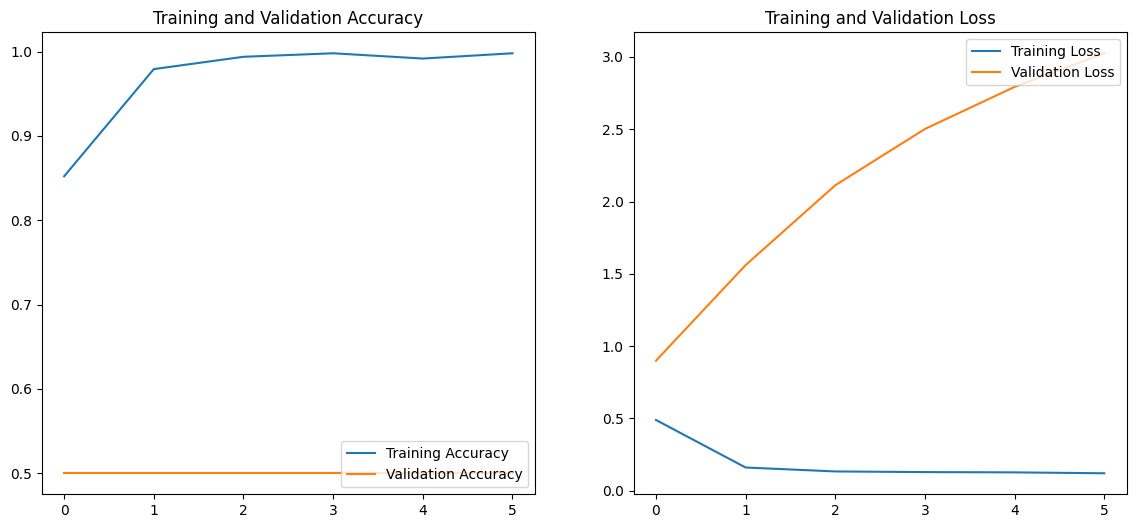

In [163]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

In [131]:
# test set
loss, acc = model.evaluate(testSet)
print('test_oss:', loss)
print('test_acc:', acc)

3/3 [==============================] - 1s 183ms/step - loss: 1.7938 - accuracy: 0.5063
test_oss: 1.7937915325164795
test_acc: 0.5062500238418579


In [133]:
predictions = model.predict(valSet)
acClass = []
for x, labels in valSet:
    acClass.extend(labels)

for i in range(len(predictions)):
    predicted_class = np.argmax(predictions[i])
    actual_class = acClass[i]
    probability_scores = predictions[i]

    print(f"Sample {i + 1}: Predicted Class={predicted_class},   Actual Class={actual_class},   Probability Scores={probability_scores}")

3/3 [==============================] - 1s 191ms/step
Sample 1: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.9630241]
Sample 2: Predicted Class=0,   Actual Class=0,   Probability Scores=[0.7152182]
Sample 3: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.8221617]
Sample 4: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.967774]
Sample 5: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.9541432]
Sample 6: Predicted Class=0,   Actual Class=0,   Probability Scores=[0.61647403]
Sample 7: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.98013806]
Sample 8: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.96771187]
Sample 9: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.8893137]
Sample 10: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.8896782]
Sample 11: Predicted Class=0,   Actual Class=1,   Probability Scores=[0.9159576]
Sample 12: Predicted Class=0,   Actual Class=0,   Probability S

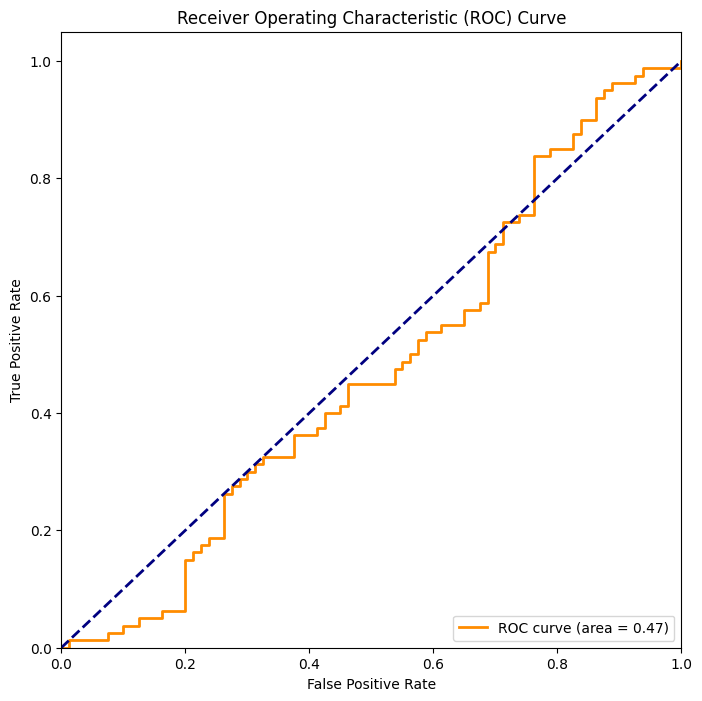

In [134]:
fpr, tpr, _ = roc_curve(acClass, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [139]:
class_names = valSet.class_names
print("Class Names:", class_names)

true_labels = valSet.map(lambda x, y: y)
true_labels = np.concatenate(list(true_labels.as_numpy_iterator()))
print("True Labels:", true_labels)

Class Names: ['AI', 'Human']
True Labels: [0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 1 1 0 1 0 0 0 1]


In [140]:
# Assuming `validation_generator` is your validation dataset generator
# Make sure to set shuffle=False for consistent ordering
predictions = model.predict(valSet)
# true_labels = valSet.classes  # Ensure this matches your validation data

# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(true_labels, predictions)

# Example: Choose a threshold that balances precision and recall
# This is a simplistic approach; consider your specific application needs
optimal_idx = np.argmax(precisions + recalls)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Convert probabilities to class predictions based on the new threshold
new_predictions = (predictions > optimal_threshold).astype(int)

# Example: Evaluate performance with the new threshold
from sklearn.metrics import accuracy_score
new_accuracy = accuracy_score(true_labels, new_predictions)
print(f"New Accuracy: {new_accuracy}")

3/3 [==============================] - 1s 219ms/step
Optimal Threshold: 0.42601773142814636
New Accuracy: 0.5


__<h2>🤖 Data Augmentation 🤖</h2>__

In [32]:
def spec_augment(spectrogram, num_mask=2, freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):
    """
    Apply SpecAugment on a spectrogram.
    
    Parameters:
    - spectrogram: The input spectrogram.
    - num_mask: Number of masks to apply for both frequency and time masking.
    - freq_masking_max_percentage: Maximum percentage of frequency bands to mask.
    - time_masking_max_percentage: Maximum percentage of time steps to mask.
    """
    freq_channels = spectrogram.shape[0]
    time_channels = spectrogram.shape[1]
    
    # Frequency masking
    for _ in range(num_mask):
        freq_band = np.random.uniform(low=0.0, high=freq_masking_max_percentage * freq_channels)
        freq_base = np.random.uniform(low=0.0, high=freq_channels - freq_band)
        spectrogram[int(freq_base):int(freq_base+freq_band), :] = 0
    
    # Time masking
    for _ in range(num_mask):
        time_band = np.random.uniform(low=0.0, high=time_masking_max_percentage * time_channels)
        time_base = np.random.uniform(low=0.0, high=time_channels - time_band)
        spectrogram[:, int(time_base):int(time_base+time_band)] = 0
    
    return spectrogram

def data_generator(batch_size, dataset):
    """
    A generator that yields batches of augmented spectrograms.
    
    Parameters:
    - batch_size: Size of the batch.
    - dataset: The dataset to iterate over.
    """
    while True:
        batch_features = []
        batch_labels = []
        
        for features, label in dataset:
            augmented_features = spec_augment(features.numpy())
            batch_features.append(augmented_features)
            batch_labels.append(label)
            
            if len(batch_features) == batch_size:
                yield np.array(batch_features), np.array(batch_labels)
                batch_features = []
                batch_labels = []

# trainSet object containing your spectrogram data
batch_size = 64
augmented_train_dataset = data_generator(batch_size, trainSet)
augmented_val_dataset = data_generator(batch_size, valSet)

In [ ]:
file1 = "Human"
source_dir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/validation/{}/".format(file1)
target_dir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/augmentedValSet/{}/".format(file1)
os.makedirs(target_dir, exist_ok=True)

def save_augmented_images(source_dir, target_dir, augment_function):
    image_files = [f for f in os.listdir(source_dir) if f.endswith('.png')]
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(source_dir, image_file)
        image = Image.open(image_path)
        image_array = np.array(image)

        # Augment the image
        augmented_image_array = augment_function(image_array)

        # Save the augmented image
        augmented_image = Image.fromarray(augmented_image_array)
        augmented_image_path = os.path.join(target_dir, f"aug_{image_file}")
        augmented_image.save(augmented_image_path)

    print(f"Total images after augmentation: {len(os.listdir(target_dir))}")

save_augmented_images(source_dir, target_dir, spec_augment)

In [68]:
augTrain = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/augmentedTrainSet"
augVal = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data1/augmentedValSet"

In [89]:
newTrainSet = image_dataset_from_directory(
    augTrain,
    image_size = (224,224),
    batch_size = 64
)

newValSet = image_dataset_from_directory(
    augVal,
    image_size = (224,224),
    batch_size = 64
)

Found 960 files belonging to 2 classes.
Found 320 files belonging to 2 classes.


In [90]:
# training from scratch
def build_model_scratch3():
  model = Sequential()
  model.add(Input((224,224,3)))
  model.add(Rescaling(1./255)) # normalize colors pixcel from 0 = black, 255 = white --> length 0-1
  
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [91]:
model = build_model_scratch3()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(newTrainSet, epochs=20, validation_data=newValSet, verbose=1,
                    batch_size = 64, callbacks=[early_stopping_cb,model_checkpoint_cb2,reduce_lr_cb])

# history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_39 (Ba  (None, 112, 112, 32)      128       
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 flatten_11 (Flatten)        (None, 401408)          

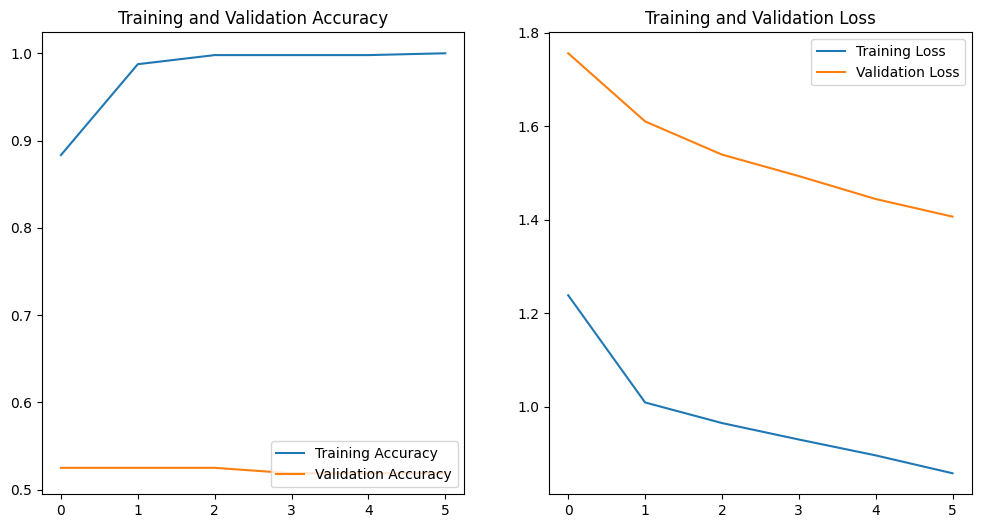

In [127]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

In [128]:
# test set
loss, acc = model.evaluate(testSet)
print('test_oss:', loss)
print('test_acc:', acc)

3/3 [==============================] - 1s 184ms/step - loss: 1.7938 - accuracy: 0.5063
test_oss: 1.7937915325164795
test_acc: 0.5062500238418579
